In [40]:
import os
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

setting up the dataset

In [41]:
data_dir = 'asl'

In [42]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3, min_tracking_confidence=0.3, max_num_hands=1)

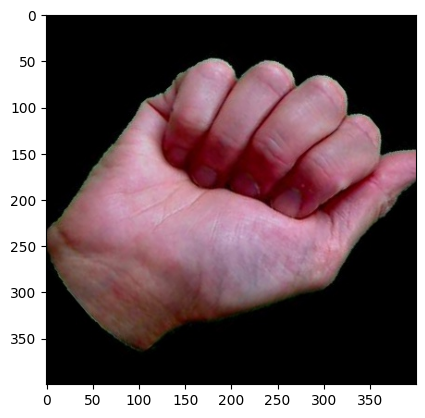

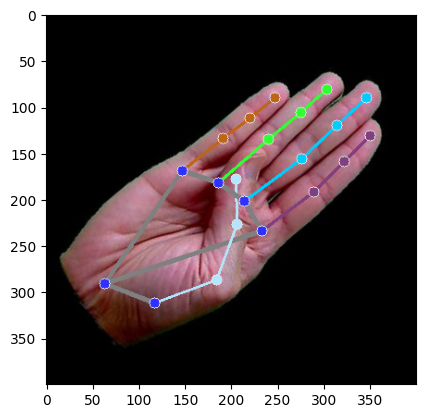

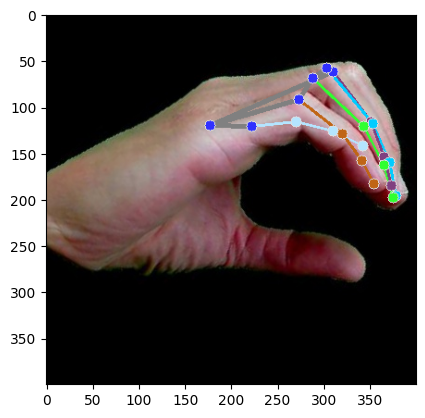

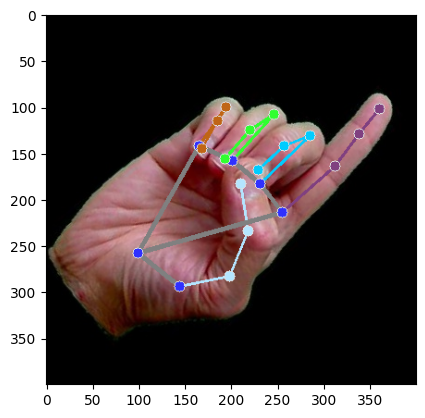

In [43]:
for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_))[:1]:
        img = cv2.imread(os.path.join(data_dir, dir_,img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hands_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hands_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )
        plt.figure()
        plt.imshow(img_rgb)
        plt.show()
        plt.close()

In [44]:
data = []
labels = []

In [45]:
for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_)):
        data_aux = []
        img = cv2.imread(os.path.join(data_dir, dir_,img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hands_landmarks in results.multi_hand_landmarks:
                for i in range(len(hands_landmarks.landmark)):
                    x = hands_landmarks.landmark[i].x
                    y = hands_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
            data.append(data_aux)
            labels.append(dir_)

In [46]:
f = open('data.pickle', 'wb')
pickle.dump({'data':data,'labels':labels}, f)
f.close()

training the classifier

In [47]:
data_dict = pickle.load(open('data.pickle', 'rb'))

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [51]:
model = RandomForestClassifier()

In [52]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
y_predict = model.predict(x_test)

In [54]:
score = accuracy_score(y_predict, y_test)

In [55]:
print(f'Accuracy: {score*100:.4f}%')

Accuracy: 100.0000%


In [56]:
f = open('model.p', 'wb')
pickle.dump({'model':model}, f)
f.close()